
image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 19.8ms
Speed: 2.7ms preprocess, 19.8ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)
1


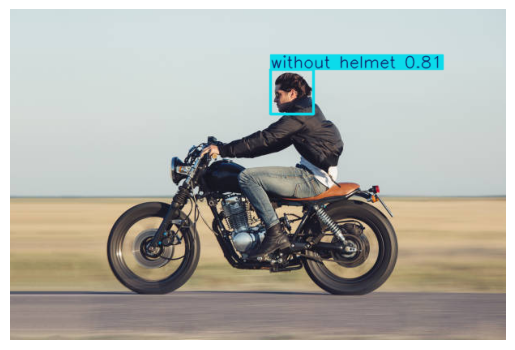

In [7]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt

model = YOLO("best.pt")
results = model("image.jpg")  

for result in results:
    for box in result.boxes:
        print(int(box.cls[0]))
    img_with_boxes = result.plot()
    img_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb)
    plt.axis('off')  
    plt.show()

    cv2.imwrite("output_image.jpg", img_with_boxes)


In [2]:
import time
from ultralytics import YOLO


model = YOLO("best.pt")
image_path = "image.jpg"
num_iterations = 100

# Warm-up the model (important for accurate timing, especially on GPUs)
for _ in range(10):
    _ = model(image_path)

# Measure inference time over multiple iterations
start_time = time.time()
for _ in range(num_iterations):
    results = model(image_path)
end_time = time.time()

# Calculate average inference time and FPS
total_time = end_time - start_time
avg_inference_time = total_time / num_iterations
fps = 1 / avg_inference_time

print(f"Average Inference Time: {avg_inference_time:.4f} seconds")
print(f"Frames Per Second (FPS): {fps:.2f}")



image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 16.1ms
Speed: 2.0ms preprocess, 16.1ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 15.4ms
Speed: 2.1ms preprocess, 15.4ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 15.7ms
Speed: 2.0ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 15.6ms
Speed: 2.0ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/vinhdoanthe/my-projects/data4life/image.jpg: 448x640 1 without helmet, 15.5ms
Speed: 2.0ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 448, 640)

image 1/1 /home/vinhdoanthe/my-projects

In [3]:
import time
import cv2
from ultralytics import YOLO


model = YOLO("best.pt")
video_path = "video.mp4"
cap = cv2.VideoCapture(video_path)

# Warm-up the model with a few frames
for _ in range(10):
    ret, frame = cap.read()
    if not ret:
        break
    _ = model(frame)

# Measure FPS over a number of frames
num_frames = 100
start_time = time.time()

for _ in range(num_frames):
    ret, frame = cap.read()
    if not ret:
        break
    results = model(frame) 

end_time = time.time()
cap.release()

# Calculate average inference time and FPS
total_time = end_time - start_time
avg_inference_time = total_time / num_frames
fps = 1 / avg_inference_time

print(f"Average Inference Time: {avg_inference_time:.4f} seconds")
print(f"Frames Per Second (FPS): {fps:.2f}")



0: 384x640 (no detections), 56.9ms
Speed: 1.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 helmet, 15.6ms
Speed: 1.7ms preprocess, 15.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 without helmet, 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 without helmet, 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 helmet, 15.7ms
Speed: 1.7ms preprocess, 15.7ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 without helmet, 15.8ms
Speed: 1.8ms preprocess, 15.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 without helmet, 15.9ms
Speed: 1.7ms preprocess, 15.9ms inference, 

In [ ]:
import cv2
from ultralytics import YOLO

# Load the fine-tuned YOLO model
model = YOLO("best.pt")
input_video_path = "video.mp4"  # Replace with your input video path

# Open the video using OpenCV
cap = cv2.VideoCapture(input_video_path)
if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Process each frame in the video
frames_to_save = []  # List to keep track of frames to save
saved_seconds = set()  # Keep track of the seconds where we already saved a frame

while cap.isOpened() and len(saved_seconds) < 10:  # Stop if we have saved 10 frames
    frame_index = int(cap.get(cv2.CAP_PROP_POS_FRAMES))
    current_second = frame_index / fps
    
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the current frame
    results = model(frame)
    
    # Check if "without helmet" label is detected in the current frame
    for result in results:
        labels = [result.names[int(box.cls[0])] for box in result.boxes]
        if any(label == "without helmet" for label in labels):
            # If the current second is not in saved_seconds, save this frame
            if int(current_second) not in saved_seconds:
                frame_to_save_path = f"saved_frame_{int(current_second)}.jpg"
                cv2.imwrite(frame_to_save_path, frame)  # Save the frame as an image
                saved_seconds.add(int(current_second))
                frames_to_save.append((int(current_second), frame_to_save_path))
                print(f"Saved frame at second {int(current_second)} as {frame_to_save_path}")

                # Stop if we've saved 10 frames
                if len(saved_seconds) >= 10:
                    break
    
    # Check if we've gathered enough frames
    if len(saved_seconds) >= 10:
        break

# Release resources
cap.release()

# Display the saved frames info
print("Saved frames with 'without helmet' label:")
for sec, path in frames_to_save:
    print(f"Second: {sec}, Frame saved at: {path}")
